In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from scipy.optimize import curve_fit
from IPython.display import display, Markdown

# Constants
R_CONST = 8.314e-3  # defines the gas constant in KJ / mol·K

# Function
def clausius_clapeyron_relation(T, delta_H, c):
    """Function to represent the Clausius-Clapeyron relation."""
    # The Clausius-Clapeyron equation is used to describe the phase transition between two states of matter
    # Here, it is used to calculate the vapor pressure of a substance at a particular temperature
    return -delta_H/R_CONST/T + c  # c is a constant

# Plot settings
def plot_settings():
    """Function to handle plot settings"""
    plt.figure(figsize=(5,4),dpi=800)
    font = {'family': 'serif', 'size': 16}
    plt.rc('font', **font)
    #plt.rc('text', usetex=True)
    
plot_settings()

<Figure size 4000x3200 with 0 Axes>

Clausius–Clapeyron relation

$$\frac{\mathrm{d} P}{\mathrm{~d} T}=\frac{\Delta H_{\rm{vap}}}{T \Delta v}$$

The equation can be further simplified by making the assumption that the vapor phase behaves like an ideal gas, resulting in:
$$\ln P=-\frac{\Delta H_{\rm{vap}}}{R} \frac{1}{T}+c$$


Determine the boiling temperature at 1 bar
$$ {T_{\rm b}} = \frac{\Delta H_{\rm{vap}}}{c*R}  $$


# Elongated box; Z X3



    $\Delta H(cal)$: 47.609 $\pm$ 3.046  KJ/mol 
    $T_b $: 397.605 $\pm$  1.9 K
    

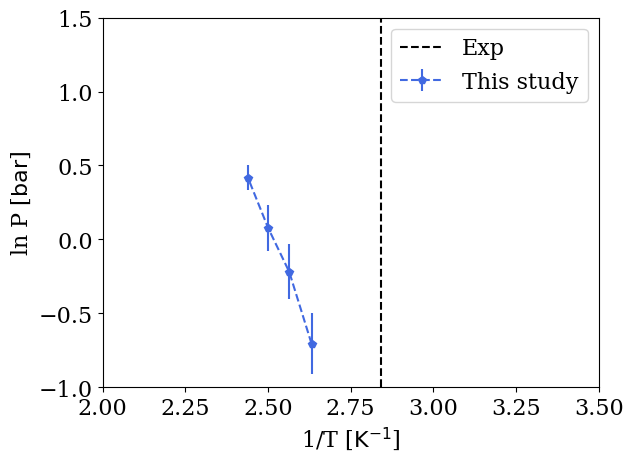

In [11]:
# Load data
data = np.loadtxt("/Users/xiaoyuwang/Downloads/GitHub/Boiling Point/water_Pvap_T_MD_SPCE.data")
T_list, Pg_list, Pg_err_list = data[:, 0], data[:, 1], data[:, 2] 

Pg_list = Pg_list
Pg_err_list = Pg_err_list
# error propagation relation for ln(x) is sigma(ln(x)) = sigma_x/x, while x > 0;
plt.errorbar(1000/T_list, np.log(Pg_list), Pg_err_list/Pg_list, marker="p", fmt="--", c="royalblue", label="This study", )
# experimental reference
plt.axvline(x=1000/352, ls="--", color='black', label='Exp')

# plot limitations
plt.xlim(2.0, 3.5)
plt.ylim(-1, 1.5)

# labels for axes and legend
plt.ylabel(r"ln P [$\mathrm {bar} $]")
plt.xlabel(r"1/T [$\mathrm {K^{-1}} $]")
plt.legend()

# fitting Clausius_Clapeyron_relation to the data
popt, pcov = curve_fit(clausius_clapeyron_relation, T_list, np.log(Pg_list))
perr = np.sqrt(np.diag(pcov))

# displaying the fitted parameters
display(Markdown(
    rf"""
    $\Delta H(cal)$: {popt[0]:.3f} $\pm$ {np.sqrt(np.diag(pcov))[0]:.3f}  KJ/mol 
    $T_b $: {popt[0]/(R_CONST*popt[1]):.3f} $\pm$  1.9 K
    """))


In [7]:
import numpy as np
from scipy.optimize import curve_fit


# actual data
xdata = T_list
ydata = np.log(Pg_list)
yerr  = Pg_err_list/Pg_list  # uncertainties in ydata

# number of synthetic datasets to create
N = 10000

# storage for fit parameters
fit_params = np.zeros((N, 3))

for i in range(N):
    # create a synthetic dataset
    ydata_synthetic = ydata + yerr * np.random.randn(len(ydata))

    # fit to the synthetic dataset
    popt, pcov = curve_fit(clausius_clapeyron_relation, xdata, ydata_synthetic)

    par = np.append(popt, popt[0]/(popt[1]*R_CONST))
    # store the fit parameters
    fit_params[i] = par

# analyze the distribution of fit parameters
fit_params_mean = fit_params.mean(axis=0)
fit_params_std = fit_params.std(axis=0)

print("Mean fit parameters: ", fit_params_mean)
print("Uncertainty in the fit parameters: ", fit_params_std)

T_b = fit_params_mean[-1]
T_b_error = fit_params_std[-1]

Mean fit parameters:  [ 47.55677899  14.38674273 397.47553828]
Uncertainty in the fit parameters:  [9.34989166 2.80825589 2.20970227]
